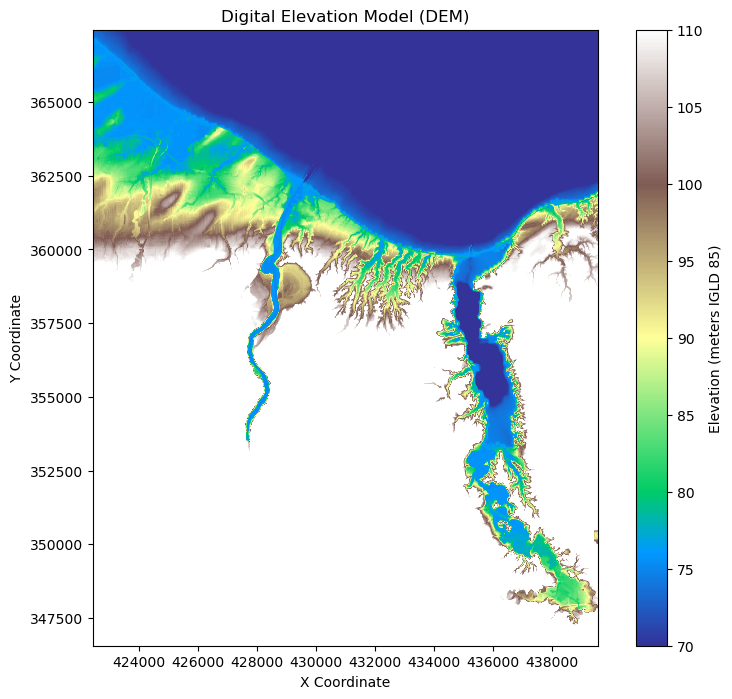

In [1]:
# Visualize DEM 

import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Path to the DEM file
dem_path = r"your\dem\file\here"

# Open the DEM file using rasterio
with rasterio.open(dem_path) as dem_dataset:
    dem_data = dem_dataset.read(1)  # Read the first band (assumed to be the elevation data)
    dem_transform = dem_dataset.transform  # Get the affine transform

# Plot the DEM data
plt.figure(figsize=(10, 8))
plt.imshow(dem_data, cmap='terrain', extent=(dem_transform[2], dem_transform[2] + dem_transform[0] * dem_data.shape[1], dem_transform[5] + dem_transform[4] * dem_data.shape[0], dem_transform[5]), 
           vmin = 70, vmax = 110) #set the vmin and vmax to your desired boundaries 
plt.colorbar(label='Elevation (meters IGLD 85)')
plt.title('Digital Elevation Model (DEM)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


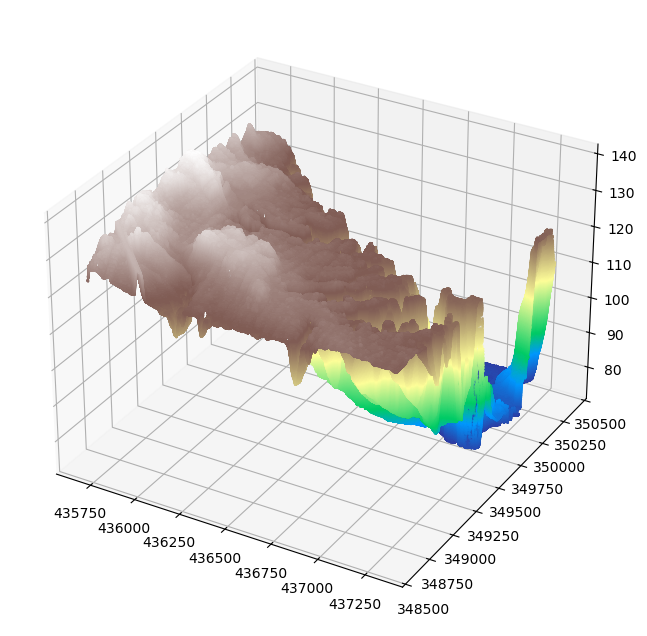

In [8]:
# Visualize LiDAR

import laspy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to the LAS file
las_path = "your\las\file\here"

# Read the LAS file using laspy
las = laspy.read(las_path)

# Extract the x, y, z coordinates
x = las.X * las.header.scale[0] + las.header.offset[0]
y = las.Y * las.header.scale[1] + las.header.offset[1]
z = las.Z * las.header.scale[2] + las.header.offset[2]

# Create a 3D scatter plot of the point cloud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with points colored by elevation (z)
sc = ax.scatter(x, y, z, c=z, cmap='terrain', marker='.', s=1)

# Add color bar
cb = plt.colorbar(sc, ax=ax, label='Elevation (meters)')

# Set plot labels
ax.set_title('3D Point Cloud Visualization')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()
